# CC1000 Laboratorio Presencial 9

**Integrantes:** *Escriban acá sus nombres*

Para este laboratorio es necesario que se dirijan a `Configuración (botón ⚙ arriba a la derecha) > Sitio` y elijan el tema claro.

## Código de inicialización

Ejecuten el siguiente bloque de código para importar los módulos necesarios para la actividad.

In [3]:
import time                              # Módulo time, lo usaremos para dormir la ejecución del programa por un tiempo
import math                              # Módulo math, lo usaremos para cálculos trigonométricos
import numpy as np                       # Módulo numpy, lo usaremos para trabajar con vectores y matrices
import matplotlib.pyplot as plt          # Módulo matplotlib, lo usaremos para dibujar y mostrar imágenes
from IPython.display import clear_output # Únicamente importamos la función clear_output del módulo IPython.display para borrar imágenes ya mostradas

## Actividad

### 1. Dibujo de un frame (una imagen) de la animación

Crearemos funciones que encapsulen las instrucciones necesarias para el dibujo de un frame.

Ejecuten el siguiente bloque de código para que se cree la función `configurar_imagen`. Esta función modifica el tamaño y el espacio de coordenadas de la imagen que mostraremos con Matplotlib.

In [4]:
def configurar_imagen():
  plt.figure(figsize=(8, 4)) # Indicamos que la imagen será de un tamaño 8 x 4, asumamos que son centímetros (no lo son)
  plt.xlim(0, 120)           # Indicamos que la imagen mostrará coordenadas en X desde el 0 hasta el 120
  plt.ylim(0, 60)            # Indicamos que la imagen mostrará coordenadas en Y desde el 0 hasta el 60
  plt.axis("off")            # Desactivamos el dibujo automático de un marco con coordenadas

La función `dibujar_suelo_y_paredes` se llamará para dibujar sobre la imagen actual líneas que aparenten ser un suelo y dos paredes. Las coordenadas de los cuatro puntos que definen las líneas son:

- **Pared izquierda:** Trazo desde el punto $(0, 60)$ hasta el punto $(0, 0)$.
- **Suelo:** Trazo desde el punto $(0, 0)$ hasta el punto $(120, 0)$.
- **Pared derecha:** Trazo desde el punto $(120, 0)$ hasta el punto $(120, 60)$.

*Pueden ocupar listas (valores encerrados entre `[]`), en vez de vectores, para las coordenadas en $X$ e $Y$ de los puntos, ya que en este caso no es necesario que hagan uso de operaciones vectoriales.*

**MODIFIQUEN EL SIGUIENTE BLOQUE DE CÓDIGO PARA QUE LA FUNCIÓN DIBUJE LOS TRAZOS PEDIDOS**.

In [6]:
def dibujar_suelo_y_paredes():
  x = ([0], [0], [0], [120], [120] ,[120]) # Lista con las coordenadas en X de los puntos, pueden cambiarla por un vector si desean
  y = ([60], [0], [0], [0], [0] ,[60]) # Lista con las coordenadas en Y de los puntos, pueden cambiarla por un vector si desean
  plt.plot(x, y, c="black", linewidth=4) # Dibujamos líneas negras de grosor 4 que unan los puntos

La función `dibujar_pelota`recibe los argumentos `pos_x`, `pos_y` y `r`, y debe dibujar sobre la imagen actual líneas que aparenten ser un círculo de radio $r$ centrado en el punto $(pos_x, pos_y)$. Para esto, pueden seguir la siguiente lógica:

- Definan una variable de nombre `n`, que almacene la cantidad de puntos que unirán mediante líneas. Todos estos puntos estarán a una distancia $r$ de $(pos_x, pos_y)$ y separados por el mismo ángulo (por ejemplo, si $n=4$ su círculo parecerá un cuadrado).
- Definan una variable de nombre `alfa`. Esta variable contendrá el ángulo de separación entre los puntos, que se calcula como $\frac{2\pi}{n}$.
- Creen un vector que almacene el ángulo asociado a cada uno de los $n$ puntos, es decir, de la forma $(0, \frac{2\pi}{n}, \frac{4\pi}{n}, \cdots, 2\pi)$. Se recomienda hacer uso de la función `np.arange`.
- Para cada ángulo $\beta$ existente en el vector anterior, añadan las coordenadas del punto asociado a este ángulo. Estas coordenadas se calculan como:
  - En el eje $X$, la coordenada del punto es $pos_x + r \cdot cos(\beta)$.
  - En el eje $Y$, la coordenada del punto es $pos_y + r \cdot sen(\beta)$.

Para añadir una coordenada a la lista o vector `x`, pueden ocupar la sintaxis `x.append(valor)`, lo mismo para `y`. El módulo `math` les ofrece la variable `pi`, y las funciones `cos` y `sin` para calcular el coseno y seno de un ángulo, respectivamente.

**MODIFIQUEN EL SIGUIENTE BLOQUE DE CÓDIGO PARA QUE LA FUNCIÓN DIBUJE LOS TRAZOS PEDIDOS**.

In [5]:
def dibujar_pelota(pos_x, pos_y, r):

    n = 100
    alfa = 2 * math.pi / n
    angulos = np.arange(0, 2 * math.pi, alfa)

    x = []
    y = []

    for beta in angulos:
        x.append(pos_x + r * math.cos(beta))
        y.append(pos_y + r * math.sin(beta))
    plt.plot(x, y, c="red", linewidth=2) # Dibujamos líneas rojas de grosor 2 que unan los puntos

Ejecuten el siguiente bloque de código para que se cree la función `mostrar_pelota_y_entorno`. Esta función llama a las otras funciones creadas anteriormente para mostrar una imagen completa de la animación.

In [7]:
def mostrar_pelota_y_entorno(pos_x, pos_y, r):
  clear_output(wait=True)         # Borramos la última imagen mostrada en pantalla
  configurar_imagen()             # Configuramos la nueva imagen que mostraremos
  dibujar_suelo_y_paredes()       # Dibujamos el suelo y las paredes en la nueva imagen que mostraremos
  dibujar_pelota(pos_x, pos_y, r) # Dibujamos la pelota en la nueva imagen que mostraremos
  plt.show()                      # Mostramos la imagen

Pueden ejecutar el siguiente bloque de código, en el cual se llama a la función `mostrar_pelota_y_entorno`, para verificar que se realiza y muestra el dibujo correctamente en pantalla.

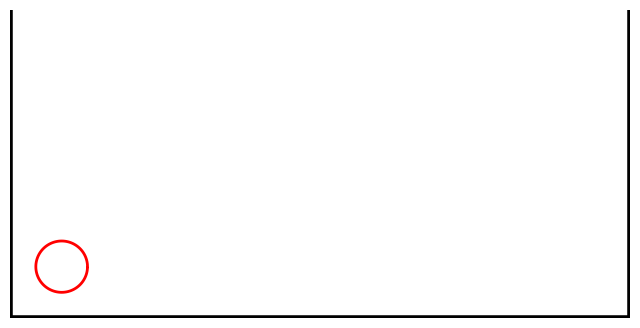

In [8]:
mostrar_pelota_y_entorno(10, 10, 5) # Mostramos una pelota de radio 5 en la posición (10, 10), además del suelo y las paredes

*(Para pensar) ¿Se generan dos imágenes por separado si llaman dos veces seguidas a la función? ¿Por qué?*

### 2. Simulación física

Crearemos funciones que encapsulen las instrucciones necesarias para la simulación física del movimiento de la pelota. En esta simulación, la pelota tiene una posición (centro de la pelota) y velocidad asociadas.

La función `procesar_movimiento`recibe los argumentos `pos`, `vel` y `dt`, que corresponden a un vector 2D de la posición de la pelota, un vector 2D de su velocidad y un delta de tiempo. Esta función debe entregar una estimación aproximada de la posición y velocidad nuevas de la pelota, luego de que hayan pasado $\delta t$ segundos. Para esto, consideren lo siguiente:

- Si la posición de un objeto es $pos = (pos_x, pos_y)$  y su velocidad es $vel = (vel_x, vel_y)$, se puede estimar su posición luego de $\delta t$ segundos como $pos + vel \cdot \delta t$.
- Si la velocidad de un objeto es $vel = (vel_x, vel_y)$  y su aceleración es $acc = (acc_x, acc_y)$, se puede estimar su velocidad luego de $\delta t$ segundos como $vel + acc \cdot \delta t$.
- En esta simulación, la aceleración de la pelota es constante, y se define como la aceleración de gravedad $g = (0, -9.8)$.

**MODIFIQUEN EL SIGUIENTE BLOQUE DE CÓDIGO PARA QUE LA FUNCIÓN ENTREGUE LOS VECTORES CORRECTOS**.

In [ ]:
def procesar_movimiento(pos, vel, dt):
  g = np.array([0, -9.8])
  new_pos = pos + vel * dt # Posición de la pelota luego de dt segundos
  new_vel = vel + g * dt # Velocidad de la pelota luego de dt segundos
  return new_pos, new_vel # La función entrega como valor ambos vectores, separados por `,`

La función `procesar_colisiones`recibe los argumentos `pos`, `vel`, `r` y `b`, que corresponden a un vector 2D de la posición de la pelota, un vector 2D de su velocidad, el radio de la pelota y su coeficiente de rebote. Esta función debe verificar si la pelota está chocando con el suelo o las paredes, y corregir su posición y velocidad correctamente. Para esto, consideren lo siguiente:

- La pelota choca con la pared izquierda si su coordenada en $X$ es menor a $r$. De ocurrir esto, se tiene que corregir su posición en $X$ a $r$, y su velocidad en $X$ tiene que invertirse (multiplicarse por $-1$).
- La pelota choca con la pared derecha si su coordenada en $X$ es mayor a $120 - r$. De ocurrir esto, se tiene que corregir su posición en $X$ a $120 - r$, y su velocidad en $X$ tiene que invertirse (multiplicarse por $-1$).
- La pelota choca con el suelo si su coordenada en $Y$ es menor a $r$. De ocurrir esto, se tiene que corregir su posición en $Y$ a $r$, y su velocidad en $Y$ tiene que invertirse (multiplicarse por $-1$).
- El coeficiente de rebote $b$ define cuánta rapidez conserva la pelota luego de un choque. Si la pelota choca, su velocidad en la dirección del choque se multiplica por $b$.

Por ejemplo, si la pelota tiene una velocidad en $Y$ de $-4$, un $b = 0.5$ y está chocando con el suelo, su nueva velocidad en $Y$ será de $2$ (rebota hacia arriba pero con la mitad de rapidez con la que estaba bajando).

Recuerden que pueden usar la sintaxis `pos[0]` para acceder o modificar el primer valor del vector `pos` (la coordenada $X$), y `pos[1]` para acceder o modificar su segundo valor (la coordenada $Y$). Lo mismo para cualquier otro vector.

**MODIFIQUEN EL SIGUIENTE BLOQUE DE CÓDIGO PARA QUE LA FUNCIÓN ENTREGUE LOS VECTORES CORRECTOS**.

In [ ]:

def procesar_colisiones(pos, vel, r, b):
  new_pos = pos # Posición de la pelota corregida, modifiquen esta variable como estimen
  new_vel = vel # Velocidad de la pelota corregida, modifiquen esta variable como estimen

  if new_pos[0] < r:
        new_pos[0] = r
        new_vel[0] *= -b


  if new_pos[0] > 120 - r:
        new_pos[0] = 120 - r
        new_vel[0] *= -b


  if new_pos[1] < r:
        new_pos[1] = r
        new_vel[1] *= -b

  return new_pos, new_vel # La función entrega como valor ambos vectores, separados por `,`

Ejecuten el siguiente bloque de código para que se cree la función `procesar_fisicas`. Esta función llama a las otras funciones creadas para entregar la posición y velocidad nuevas de la pelota luego de que hayan pasado `dt` segundos y de tener en cuenta posibles colisiones con el entorno.

In [ ]:
def procesar_fisicas(pos, vel, r, b, dt):
  new_pos, new_vel = procesar_movimiento(pos, vel, dt) # Posicion y velocidad luego de dt segundos
  new_pos, new_vel = procesar_colisiones(new_pos, new_vel, r, b) # Posicion y velocidad luego de colisiones
  return new_pos, new_vel

Si ya realizaron todo lo pedido, al ejecutar el siguiente bloque de código podrán ver una animación muy bonita.

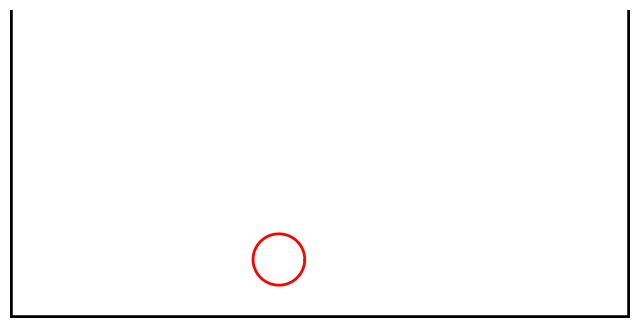

In [2]:
dt = 0.2 # Tiempo [s] que esperamos para actualizar el estado físico de la pelota y generar una nueva imagen
total_time = 12.0 # Tiempo [s] total de la simulación

r = 5 # Radio de la pelota, pueden modificar su valor
b = 0.7 # Coeficiente de rebote de la pelota, pueden modificar su valor

pos = np.array([10.0, 20.0]) # Posición de la pelota, pueden modificar su valor inicial
vel = np.array([30.0, -20.0]) # Velocidad de la pelota, pueden modificar su valor inicial

t = 0.0 # Tiempo que lleva la simulación corriendo

# Mientras t sea menor a total_time, procesamos las fisicas y dibujamos en pantalla
while t < total_time:
  pos, vel = procesar_fisicas(pos, vel, r, b, dt)

  mostrar_pelota_y_entorno(pos[0], pos[1], r)

  t = t + dt

  time.sleep(dt)

### 3. Respuestas a las preguntas planteadas

*Ingresen acá las preguntas y respuestas pedidas*